In [24]:
from torch.utils.data import Dataset
import os
import pickle
import matplotlib.pyplot as plt
import cv2

In [25]:
class PCGDataset(Dataset):
    def __init__(self, path):
        super(PCGDataset,self).__init__()
        self.root = path
        self.samples = [os.path.join(path,p) for p in os.listdir(path)]
        self.samples.sort(key = lambda x: x.split(os.sep)[-1])
        
    def __getitem__(self, index):
        p = self.samples[index]
        with open(p,"rb") as f:
            (path,target,sm,boxes,features) = pickle.load(f)
        return (path,target,sm,boxes,features)
    
    def __len__(self):
        return len(self.samples)

In [26]:
pcpath = "/share/home/fangzhengqing/Data/Keratitisbaseline_pcg_no_unet2/train"

In [27]:
pcddata = PCGDataset(pcpath)

In [44]:
import matplotlib.patches as patches
from matplotlib.ticker import NullFormatter
def pcg_visualize(path,target,sm,boxes,features):
    print(target)
    fig = plt.figure(figsize=(15, 15))
    gs = plt.GridSpec(80, 80) 
    im = plt.imread(path)
    shape = im.shape
    im = cv2.resize(im,(1784,1784),interpolation = cv2.INTER_AREA)
    origin = fig.add_subplot(gs[0:40, 0:40])
    origin.imshow(im)
    origin.xaxis.set_major_formatter(NullFormatter())
    origin.yaxis.set_major_formatter(NullFormatter())
    for box in boxes:
        rect=patches.Rectangle((box[1], box[0]),box[3]-box[1],box[2]-box[0],linewidth=2,edgecolor='w',facecolor='none')
        origin.add_patch(rect) 
    salient_map = fig.add_subplot(gs[40:80, 0:40])
    salient_map.imshow(sm)
    salient_map.xaxis.set_major_formatter(NullFormatter())
    salient_map.yaxis.set_major_formatter(NullFormatter())
    for i,box in enumerate(boxes):
        ax = fig.add_subplot(gs[i*8:(i+1)*8, 40:50])
        ax.imshow(im[box[0]:box[2],box[1]:box[3]])
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        bx = fig.add_subplot(gs[i*8:(i+1)*8, 50:60])
        bx.axis([0,10,0,10])
        bx.text(0,5,f"{box[0]} {box[1]} {box[2]} {box[3]}")
        bx.xaxis.set_major_formatter(NullFormatter())
        bx.yaxis.set_major_formatter(NullFormatter())
        

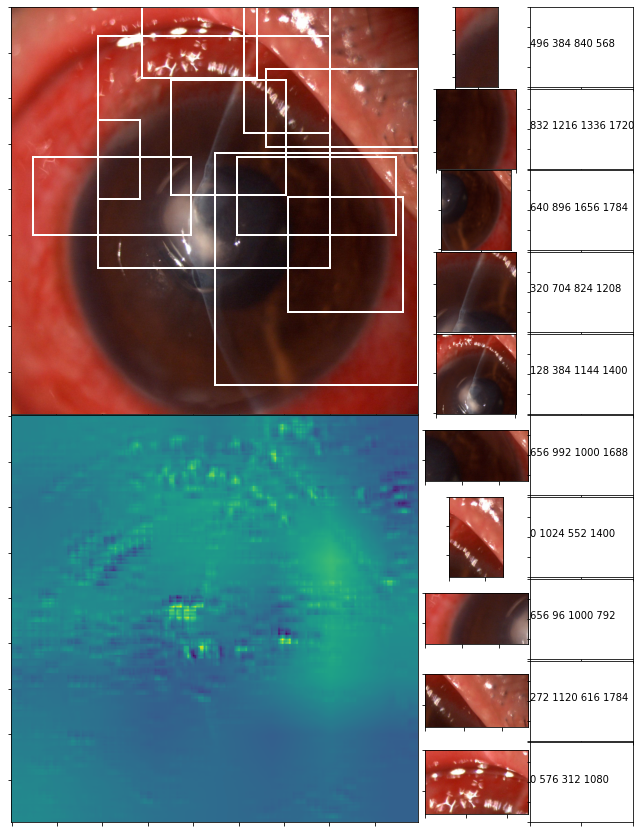

In [35]:
pcg_visualize(*pcddata[0])

tensor(3)


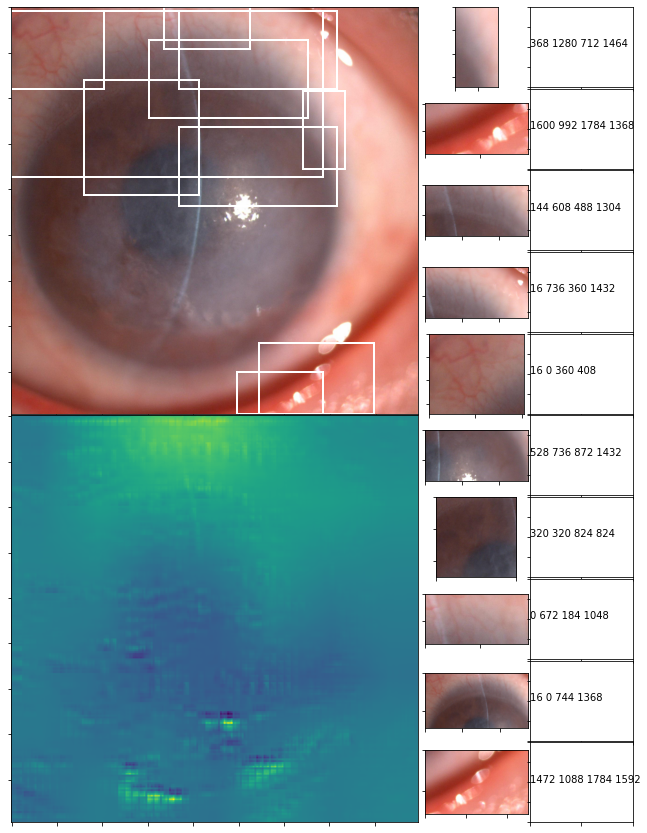

In [45]:
pcg_visualize(*pcddata[705])

tensor(2)


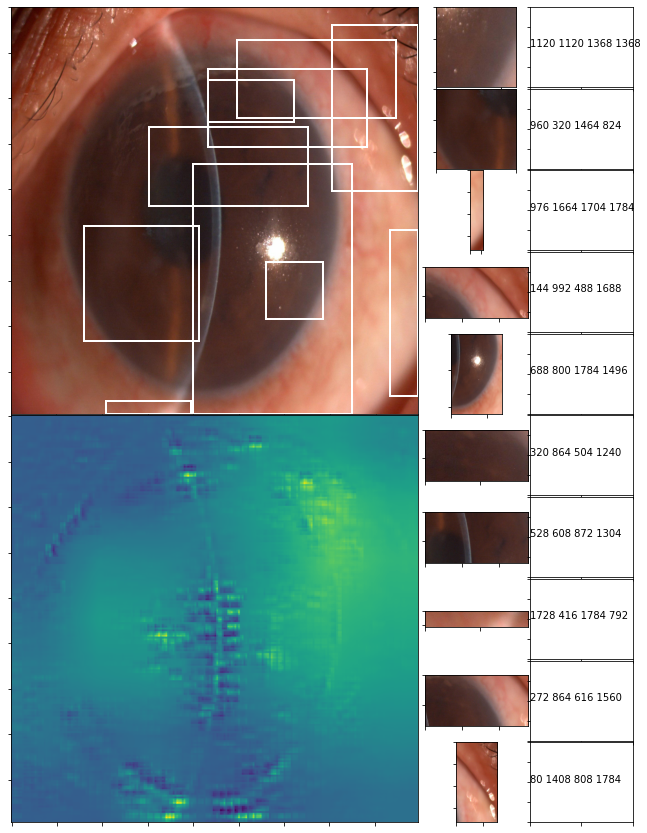

In [51]:
pcg_visualize(*pcddata[121])

In [ ]:
from PIL import Image
im = Image.open(path)

In [ ]:
np.array(im)

In [ ]:
print(plt.imread(path).shape)

In [ ]:
a = [ 3 ,2, 0 , 5, 8]

In [ ]:
a.sort(reverse = True)

In [ ]:
a